# Import Python Packages & Libraries

In [1]:
import geopandas as gpd
import matplotlib.colors as colors
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
from scipy.signal import savgol_filter
from astropy.modeling import models, fitting
from scipy import stats
import statsmodels.api as sm
import pylab as py
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from IPython.display import display_html 
from shapely.geometry import Point, Polygon

class BOLD:
   B_start = '\033[1m'
   B_end = '\033[0m'
class UNDERLINE:
    U_start = '\033[4m'
    U_end = '\033[0m'

# Nitrogen Dioxide (NO2) 

### Line Plots (2016, 2017, 2018)

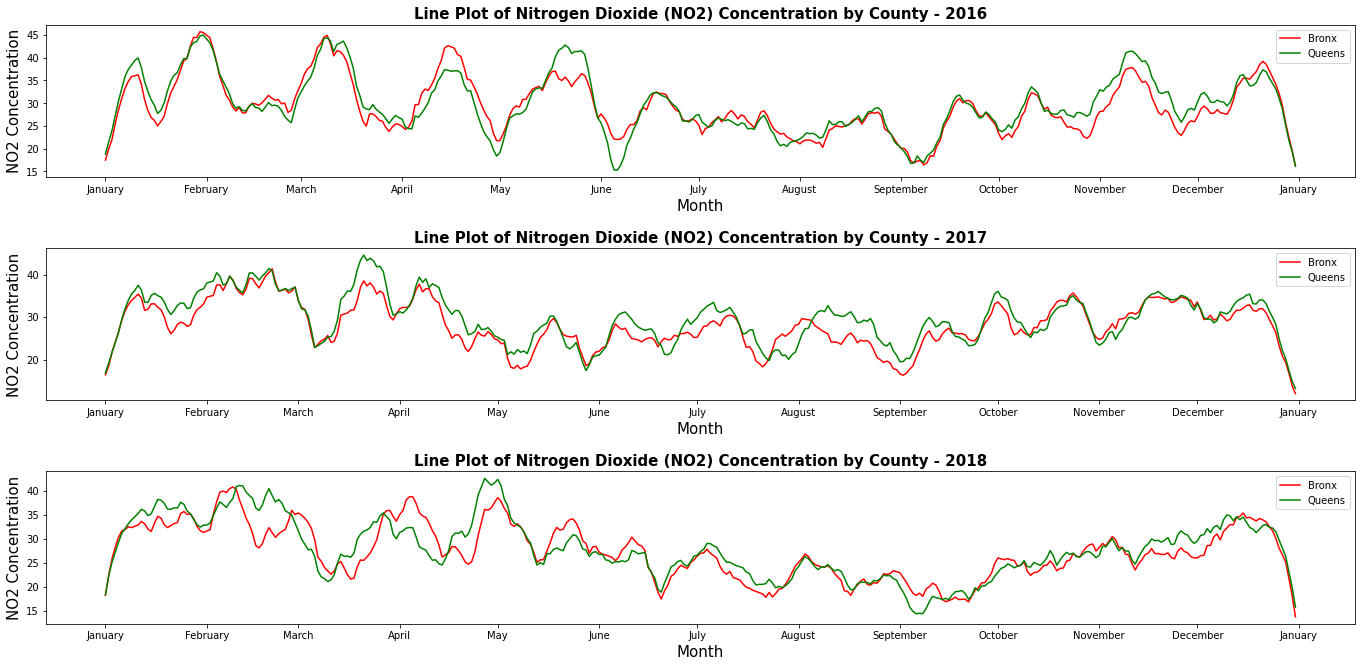

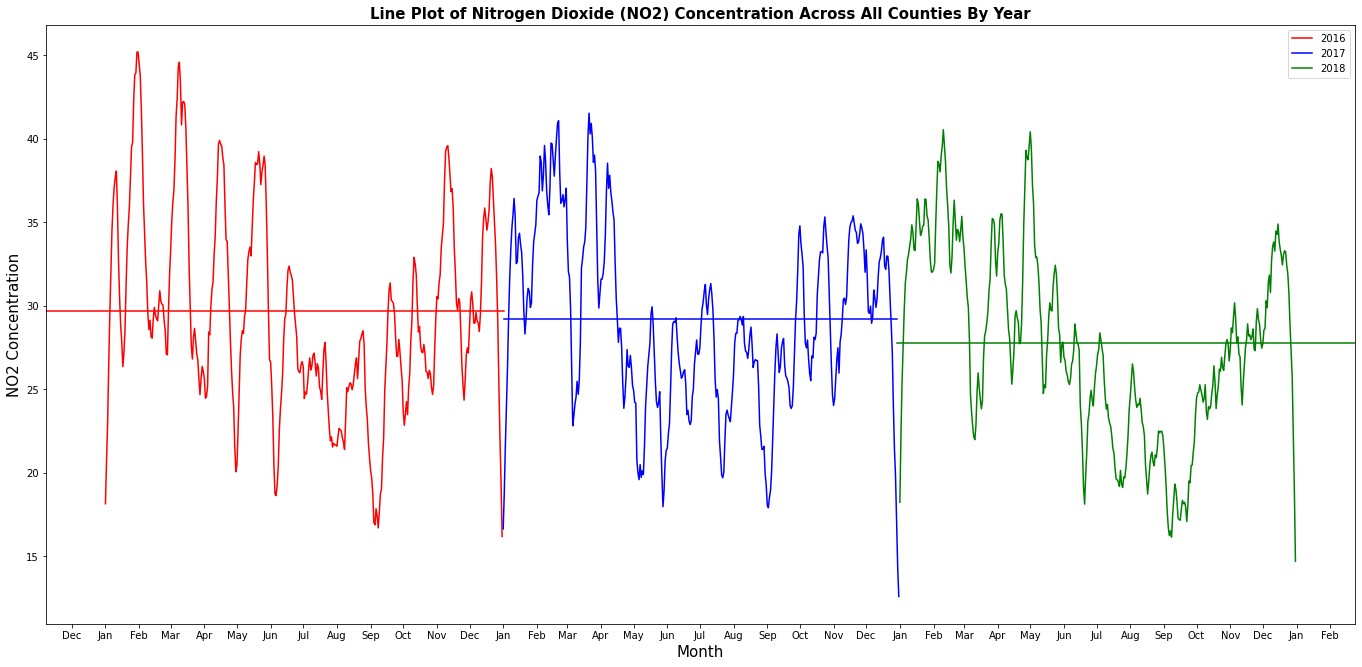

In [2]:
NO2_2016 = pd.read_csv("/Users/wwaynerichards/Desktop/Biomedical Informatics Degree/Data Wrangling/Group Project/AQI Data/NO2/NO2.2016.All_Sites_NEW.csv",
                      parse_dates = ["DATE"])
NO2_2017 = pd.read_csv("/Users/wwaynerichards/Desktop/Biomedical Informatics Degree/Data Wrangling/Group Project/AQI Data/NO2/NO2.2017.All_Sites_NEW.csv",
                      parse_dates = ["DATE"])
NO2_2018 = pd.read_csv("/Users/wwaynerichards/Desktop/Biomedical Informatics Degree/Data Wrangling/Group Project/AQI Data/NO2/NO2.2018.All_Sites_NEW.csv",
                      parse_dates = ["DATE"])

# Bronx NO2 (2016, 2017, 2018)
BRONX_NO2_2016 = NO2_2016[NO2_2016["COUNTY"] == "Bronx"]
BRONX_NO2_2017 = NO2_2017[NO2_2017["COUNTY"] == "Bronx"]
BRONX_NO2_2018 = NO2_2018[NO2_2018["COUNTY"] == "Bronx"]

BRONX_COMBINED = pd.DataFrame()
BRONX_COMBINED = pd.concat([BRONX_NO2_2016.reset_index(drop = True, inplace = False),
                BRONX_NO2_2017.reset_index(drop = True, inplace = False),
                BRONX_NO2_2018.reset_index(drop = True, inplace = False)], axis = 0, ignore_index = True)

# Queens NO2 (2016, 2017, 2018)
QUEENS_NO2_2016 = NO2_2016[NO2_2016["COUNTY"] == "Queens"]
QUEENS_NO2_2017 = NO2_2017[NO2_2017["COUNTY"] == "Queens"]
QUEENS_NO2_2018 = NO2_2018[NO2_2018["COUNTY"] == "Queens"]

QUEENS_COMBINED = pd.DataFrame()
QUEENS_COMBINED = pd.concat([QUEENS_NO2_2016.reset_index(drop = True, inplace = False),
                QUEENS_NO2_2017.reset_index(drop = True, inplace = False),
                QUEENS_NO2_2018.reset_index(drop = True, inplace = False)], axis = 0, ignore_index = True)

NO2_2016_MEAN = NO2_2016.groupby(NO2_2016["DATE"])["AQI_CONC"].mean()
NO2_2017_MEAN = NO2_2017.groupby(NO2_2017["DATE"])["AQI_CONC"].mean()
NO2_2018_MEAN = NO2_2018.groupby(NO2_2018["DATE"])["AQI_CONC"].mean()

# Line Plot Overlaying Each County for Nitrogen Dioxide (NO2) in 2016
fig, (ax1, ax2, ax3)  = plt.subplots(3, 1, sharey = "row", figsize = (20,10))
fig.tight_layout(pad = 5.0)
windowSize = 25
polyOrder = 3
legend_labels = ["Bronx","Queens"]

# 2016
smoothed = savgol_filter(BRONX_NO2_2016["AQI_CONC"], windowSize, polyOrder, mode = "constant")
ax1.plot(BRONX_NO2_2016["DATE"], smoothed, color = "red")
smoothed = savgol_filter(QUEENS_NO2_2016["AQI_CONC"], windowSize, polyOrder, mode = "constant")
ax1.plot(QUEENS_NO2_2016["DATE"], smoothed, color = "green")
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%B"))
ax1.set_title("Line Plot of Nitrogen Dioxide (NO2) Concentration by County - 2016", fontweight = "bold", size = 15)
ax1.set_ylabel("NO2 Concentration", fontsize = 15)
ax1.set_xlabel("Month", fontsize = 15)
ax1.legend(labels = legend_labels)

# 2017
smoothed = savgol_filter(BRONX_NO2_2017["AQI_CONC"], windowSize, polyOrder, mode = "constant")
ax2.plot(BRONX_NO2_2017["DATE"], smoothed, color = "red")
smoothed = savgol_filter(QUEENS_NO2_2017["AQI_CONC"], windowSize, polyOrder, mode = "constant")
ax2.plot(QUEENS_NO2_2017["DATE"], smoothed, color = "green")
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%B"))
ax2.set_title("Line Plot of Nitrogen Dioxide (NO2) Concentration by County - 2017", fontweight = "bold", size = 15)
ax2.set_ylabel("NO2 Concentration", fontsize = 15)
ax2.set_xlabel("Month", fontsize = 15)
ax2.legend(labels = legend_labels)

# 2018
smoothed = savgol_filter(BRONX_NO2_2018["AQI_CONC"], windowSize, polyOrder, mode = "constant")
ax3.plot(BRONX_NO2_2018["DATE"], smoothed, color = "red")
smoothed = savgol_filter(QUEENS_NO2_2018["AQI_CONC"], windowSize, polyOrder, mode = "constant")
ax3.plot(QUEENS_NO2_2018["DATE"], smoothed, color = "green")
ax3.xaxis.set_major_locator(mdates.MonthLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%B"))
ax3.set_title("Line Plot of Nitrogen Dioxide (NO2) Concentration by County - 2018", fontweight = "bold", size = 15)
ax3.set_ylabel("NO2 Concentration", fontsize = 15)
ax3.set_xlabel("Month", fontsize = 15)
ax3.legend(labels = legend_labels)
plt.show()

# Averaged By Year (2016, 2017, 2018)
NO2_2016_MEAN = NO2_2016.groupby(NO2_2016["DATE"])["AQI_CONC"].mean().reset_index()
NO2_2017_MEAN = NO2_2017.groupby(NO2_2017["DATE"])["AQI_CONC"].mean().reset_index()
NO2_2018_MEAN = NO2_2018.groupby(NO2_2018["DATE"])["AQI_CONC"].mean().reset_index()

# Averaged By Year (2016, 2017, 2018)
fig, ax1  = plt.subplots(1, 1, sharey = "row", figsize = (20,10))
fig.tight_layout(pad = 5.0)
windowSize = 25
polyOrder = 3
legend_labels = ["2016","2017","2018"]
smoothed = savgol_filter(NO2_2016_MEAN["AQI_CONC"], windowSize, polyOrder, mode = "constant")
ax1.plot(NO2_2016_MEAN["DATE"], smoothed, color = "red")
smoothed = savgol_filter(NO2_2017_MEAN["AQI_CONC"], windowSize, polyOrder, mode = "constant")
ax1.plot(NO2_2017_MEAN["DATE"], smoothed, color = "blue")
smoothed = savgol_filter(NO2_2018_MEAN["AQI_CONC"], windowSize, polyOrder, mode = "constant")
ax1.plot(NO2_2018_MEAN["DATE"], smoothed, color = "green")
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax1.set_title("Line Plot of Nitrogen Dioxide (NO2) Concentration Across All Counties By Year", fontweight = "bold", size = 15)
ax1.set_ylabel("NO2 Concentration", fontsize = 15)
ax1.set_xlabel("Month", fontsize = 15)
ax1.legend(labels = legend_labels)
ax1.axhline(y = NO2_2016_MEAN["AQI_CONC"].mean(), color = "red", linestyle = '-', xmax = 0.35)
ax1.axhline(y = NO2_2017_MEAN["AQI_CONC"].mean(), color = "blue", linestyle = '-', xmin = 0.35, xmax = 0.65)
ax1.axhline(y = NO2_2018_MEAN["AQI_CONC"].mean(), color = "green", linestyle = '-', xmin = 0.65, xmax = 1)

plt.show()

### Descriptive Statistics

In [3]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

print(BOLD.B_start+UNDERLINE.U_start+"Descriptive Stats - Nitrogen Dioxide (NO2); Bronx"+UNDERLINE.U_end+BOLD.B_end)
display_side_by_side([pd.DataFrame(BRONX_NO2_2016["AQI_CONC"].describe()),
                      pd.DataFrame(BRONX_NO2_2017["AQI_CONC"].describe()),
                      pd.DataFrame(BRONX_NO2_2018["AQI_CONC"].describe()),
                      pd.DataFrame(BRONX_COMBINED["AQI_CONC"].describe())], 
                     ["Bronx - 2016",
                      "Bronx - 2017",
                      "Bronx - 2018",
                      "Bronx - Combined"])

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"Descriptive Stats - Nitrogen Dioxide (NO2); Queens"+UNDERLINE.U_end+BOLD.B_end)
display_side_by_side([pd.DataFrame(QUEENS_NO2_2016["AQI_CONC"].describe()),
                      pd.DataFrame(QUEENS_NO2_2017["AQI_CONC"].describe()),
                      pd.DataFrame(QUEENS_NO2_2018["AQI_CONC"].describe()),
                      pd.DataFrame(QUEENS_COMBINED["AQI_CONC"].describe())], 
                     ["Queens - 2016",
                      "Queens - 2017",
                      "Queens - 2018",
                      "Queens - Combined"])

Descriptive Stats - Nitrogen Dioxide (NO2); Bronx


,AQI_CONC
count,366.000000
mean,29.434699
std,12.431677
min,6.600000
25%,20.300000
50%,28.300000
75%,37.475000
max,89.400000
,AQI_CONC
count,365.000000


_________________________________________________________________________________


Descriptive Stats - Nitrogen Dioxide (NO2); Queens


,AQI_CONC
count,366.000000
mean,29.953005
std,12.249707
min,5.400000
25%,20.600000
50%,29.450000
75%,38.475000
max,69.800000
,AQI_CONC
count,365.000000


### Box Plots (2016, 2017, 2018)

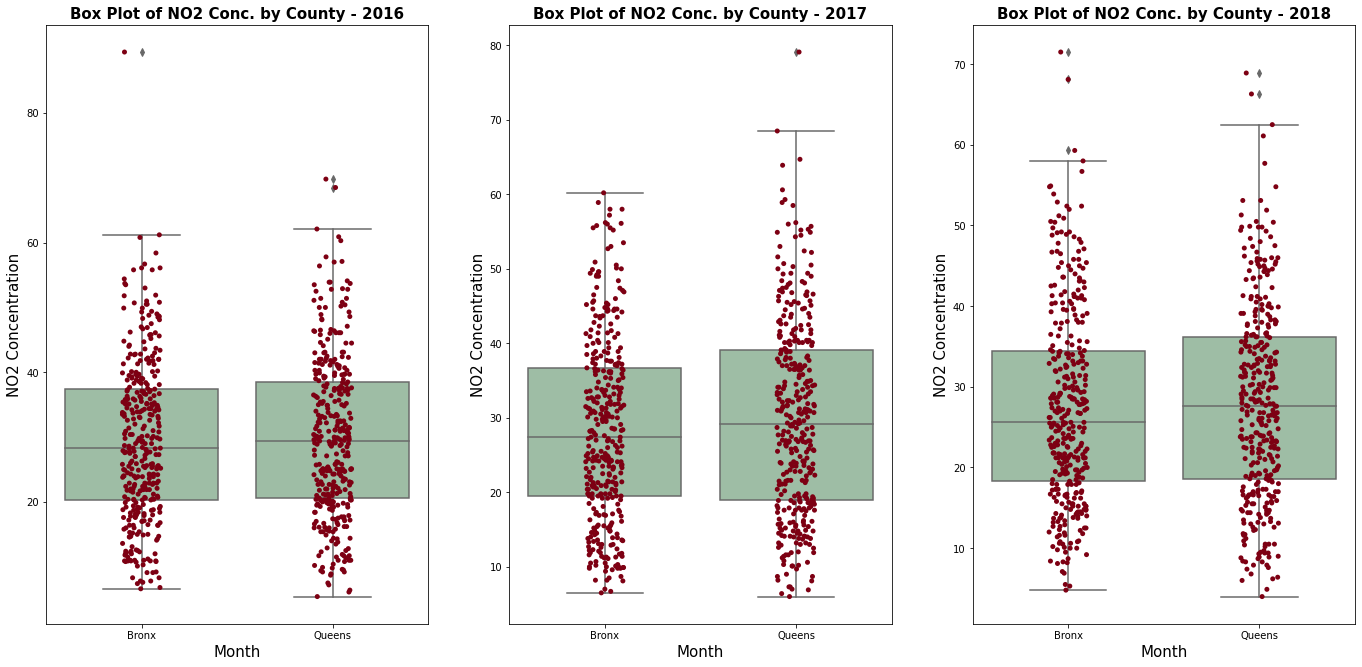

_________________________________________________________________________________


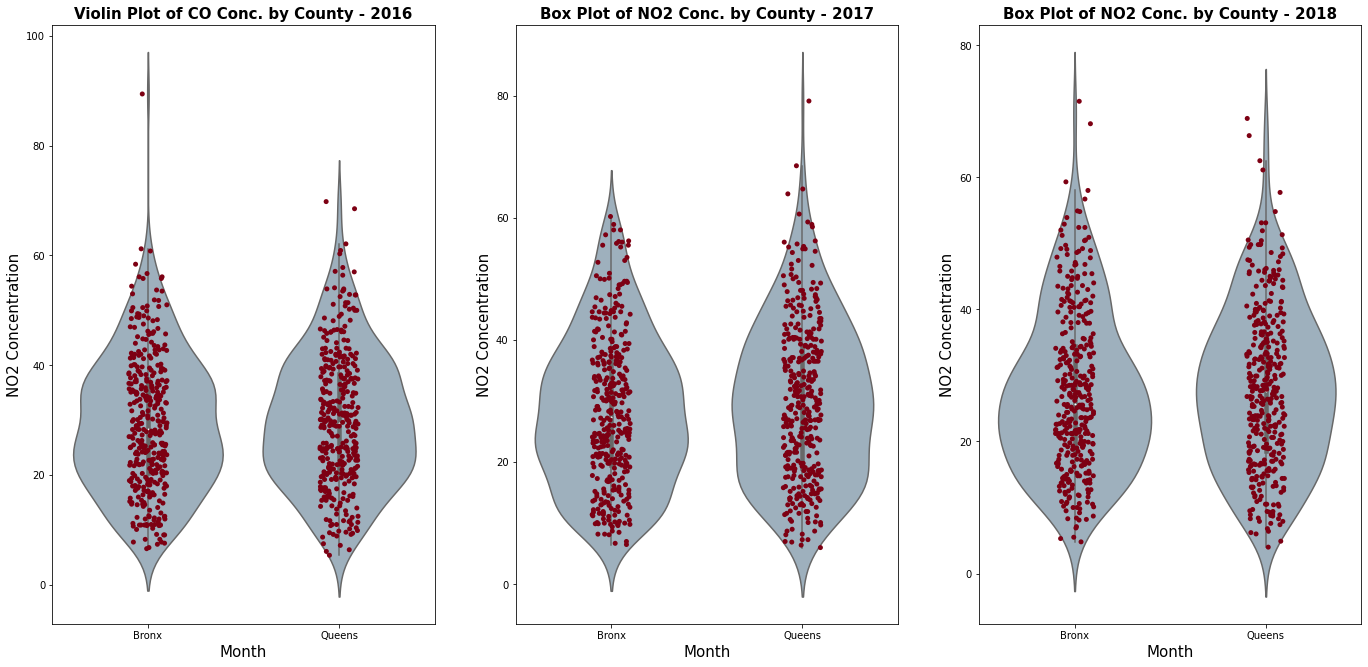

In [4]:
# Box Plots
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sns.boxplot(x = "COUNTY", y = "AQI_CONC", data = NO2_2016, color = "#99c2a2", ax = ax1, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = NO2_2016, color = "#7d0013", marker = "o", size = 5, ax = ax1, orient = "v")
ax1.set_title("Box Plot of NO2 Conc. by County - 2016", fontweight = "bold", size = 15)
ax1.set_ylabel("NO2 Concentration", fontsize = 15)
ax1.set_xlabel("Month", fontsize = 15)

sns.boxplot(x = "COUNTY", y = "AQI_CONC", data = NO2_2017, color = "#99c2a2", ax = ax2, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = NO2_2017, color = "#7d0013", marker = "o", size = 5, ax = ax2, orient = "v")
ax2.set_title("Box Plot of NO2 Conc. by County - 2017", fontweight = "bold", size = 15)
ax2.set_ylabel("NO2 Concentration", fontsize = 15)
ax2.set_xlabel("Month", fontsize = 15)

sns.boxplot(x = "COUNTY", y = "AQI_CONC", data = NO2_2018, color = "#99c2a2", ax = ax3, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = NO2_2018, color = "#7d0013", marker = "o", size = 5, ax = ax3, orient = "v")
ax3.set_title("Box Plot of NO2 Conc. by County - 2018", fontweight = "bold", size = 15)
ax3.set_ylabel("NO2 Concentration", fontsize = 15)
ax3.set_xlabel("Month", fontsize = 15)
plt.show()

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
# Violin Plots

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sns.violinplot(x = "COUNTY", y = "AQI_CONC", data = NO2_2016, color = "#99b1c2", ax = ax1, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = NO2_2016, color = "#7d0013", marker = "o", size = 5, ax = ax1, orient = "v")
ax1.set_title("Violin Plot of CO Conc. by County - 2016", fontweight = "bold", size = 15)
ax1.set_ylabel("NO2 Concentration", fontsize = 15)
ax1.set_xlabel("Month", fontsize = 15)

sns.violinplot(x = "COUNTY", y = "AQI_CONC", data = NO2_2017, color = "#99b1c2", ax = ax2, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = NO2_2017, color = "#7d0013", marker = "o", size = 5, ax = ax2, orient = "v")
ax2.set_title("Box Plot of NO2 Conc. by County - 2017", fontweight = "bold", size = 15)
ax2.set_ylabel("NO2 Concentration", fontsize = 15)
ax2.set_xlabel("Month", fontsize = 15)

sns.violinplot(x = "COUNTY", y = "AQI_CONC", data = NO2_2018, color = "#99b1c2", ax = ax3, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = NO2_2018, color = "#7d0013", marker = "o", size = 5, ax = ax3, orient = "v")
ax3.set_title("Box Plot of NO2 Conc. by County - 2018", fontweight = "bold", size = 15)
ax3.set_ylabel("NO2 Concentration", fontsize = 15)
ax3.set_xlabel("Month", fontsize = 15)
plt.show()


### T-Tests & ANOVA Tests (2016, 2017, 2018)

In [5]:
# T-Test comparison by variables

print(BOLD.B_start+UNDERLINE.U_start+"T-Test - Nitrogen Dioxide (NO2) 2016"+UNDERLINE.U_end+BOLD.B_end)
print("Queens vs. Bronx - Nitrogen Dioxide 2016")
fvalue, pvalue = stats.ttest_ind(QUEENS_NO2_2016["AQI_CONC"],BRONX_NO2_2016["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

# Ordinary Least Squares (OLS) model
print(BOLD.B_start+UNDERLINE.U_start+"ANOVA - Nitrogen Dioxide (NO2) 2016"+UNDERLINE.U_end+BOLD.B_end)
anova_df = pd.DataFrame()
anova_df = pd.concat([QUEENS_NO2_2016["AQI_CONC"].reset_index(drop = True, inplace = False),
                      BRONX_NO2_2016["AQI_CONC"].reset_index(drop = True, inplace = False)], axis = 1, ignore_index = True)
anova_df = anova_df.rename(columns = {0:"Queens",1:"Bronx"})
moore_lm = ols("""Bronx ~ Bronx + Queens + Bronx:Queens""", data = anova_df).fit()
anova_table = sm.stats.anova_lm(moore_lm, typ = 2)
print(anova_table)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"T-Test - Nitrogen Dioxide (NO2) 2017"+UNDERLINE.U_end+BOLD.B_end)
print("Queens vs. Bronx - Nitrogen Dioxide 2017")
fvalue, pvalue = stats.ttest_ind(QUEENS_NO2_2017["AQI_CONC"],BRONX_NO2_2017["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

# Ordinary Least Squares (OLS) model
print(BOLD.B_start+UNDERLINE.U_start+"ANOVA - Nitrogen Dioxide (NO2) 2017"+UNDERLINE.U_end+BOLD.B_end)
anova_df = pd.DataFrame()
anova_df = pd.concat([QUEENS_NO2_2017["AQI_CONC"].reset_index(drop = True, inplace = False),
                      BRONX_NO2_2017["AQI_CONC"].reset_index(drop = True, inplace = False)], axis = 1, ignore_index = True)
anova_df = anova_df.rename(columns = {0:"Queens",1:"Bronx"})
moore_lm = ols("""Bronx ~ Bronx + Queens + Bronx:Queens""", data = anova_df).fit()
anova_table = sm.stats.anova_lm(moore_lm, typ = 2)
print(anova_table)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"T-Test - Nitrogen Dioxide (NO2) 2018"+UNDERLINE.U_end+BOLD.B_end)
print("Queens vs. Bronx - Nitrogen Dioxide 2018")
fvalue, pvalue = stats.ttest_ind(QUEENS_NO2_2018["AQI_CONC"],BRONX_NO2_2018["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

# Ordinary Least Squares (OLS) model
print(BOLD.B_start+UNDERLINE.U_start+"ANOVA - Nitrogen Dioxide (NO2) 2018"+UNDERLINE.U_end+BOLD.B_end)
anova_df = pd.DataFrame()
anova_df = pd.concat([QUEENS_NO2_2018["AQI_CONC"].reset_index(drop = True, inplace = False),
                      BRONX_NO2_2018["AQI_CONC"].reset_index(drop = True, inplace = False)], axis = 1, ignore_index = True)
anova_df = anova_df.rename(columns = {0:"Queens",1:"Bronx"})
moore_lm = ols("""Bronx ~ Bronx + Queens + Bronx:Queens""", data = anova_df).fit()
anova_table = sm.stats.anova_lm(moore_lm, typ = 2)
print(anova_table)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"T-Test - Nitrogen Dioxide (NO2) All Years"+UNDERLINE.U_end+BOLD.B_end)
print("2016 vs. 2017 - Nitrogen Dioxide (NO2)")
fvalue, pvalue = stats.ttest_ind(NO2_2016_MEAN["AQI_CONC"],NO2_2017_MEAN["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

print("2016 vs. 2018 - Nitrogen Dioxide (NO2)")
fvalue, pvalue = stats.ttest_ind(NO2_2016_MEAN["AQI_CONC"],NO2_2018_MEAN["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

print("2017 vs. 2018 - Nitrogen Dioxide (NO2)")
fvalue, pvalue = stats.ttest_ind(NO2_2017_MEAN["AQI_CONC"],NO2_2018_MEAN["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

T-Test - Nitrogen Dioxide (NO2) 2016
Queens vs. Bronx - Nitrogen Dioxide 2016
t-Value: 0.5681 p-Value: 0.5701100863885579


ANOVA - Nitrogen Dioxide (NO2) 2016
                    sum_sq     df             F    PR(>F)
Bronx         1.876825e+04    1.0  7.632198e+28  0.000000
Queens        2.267988e-25    1.0  9.222883e-01  0.337516
Bronx:Queens  8.530187e-27    1.0  3.468842e-02  0.852354
Residual      8.901898e-23  362.0           NaN       NaN
_________________________________________________________________________________


T-Test - Nitrogen Dioxide (NO2) 2017
Queens vs. Bronx - Nitrogen Dioxide 2017
t-Value: 1.6648 p-Value: 0.09637900908586501


ANOVA - Nitrogen Dioxide (NO2) 2017
                    sum_sq     df             F    PR(>F)
Bronx         1.884455e+04    1.0  4.666915e+29  0.000000
Queens        1.782365e-26    1.0  4.414085e-01  0.506868
Bronx:Queens  7.514070e-26    1.0  1.860884e+00  0.173373
Residual      1.457683e-23  361.0           NaN       NaN
_______________

### Histograms w/Curve Fitting (2016, 2017, 2018)

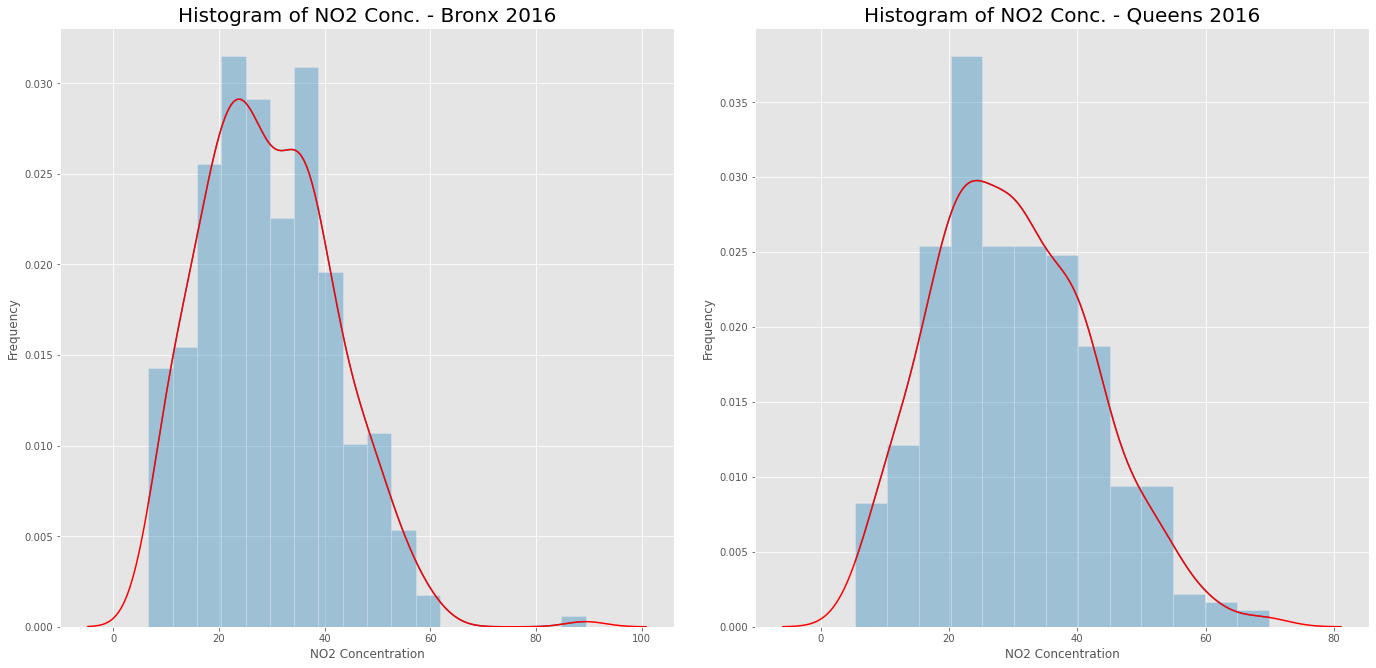

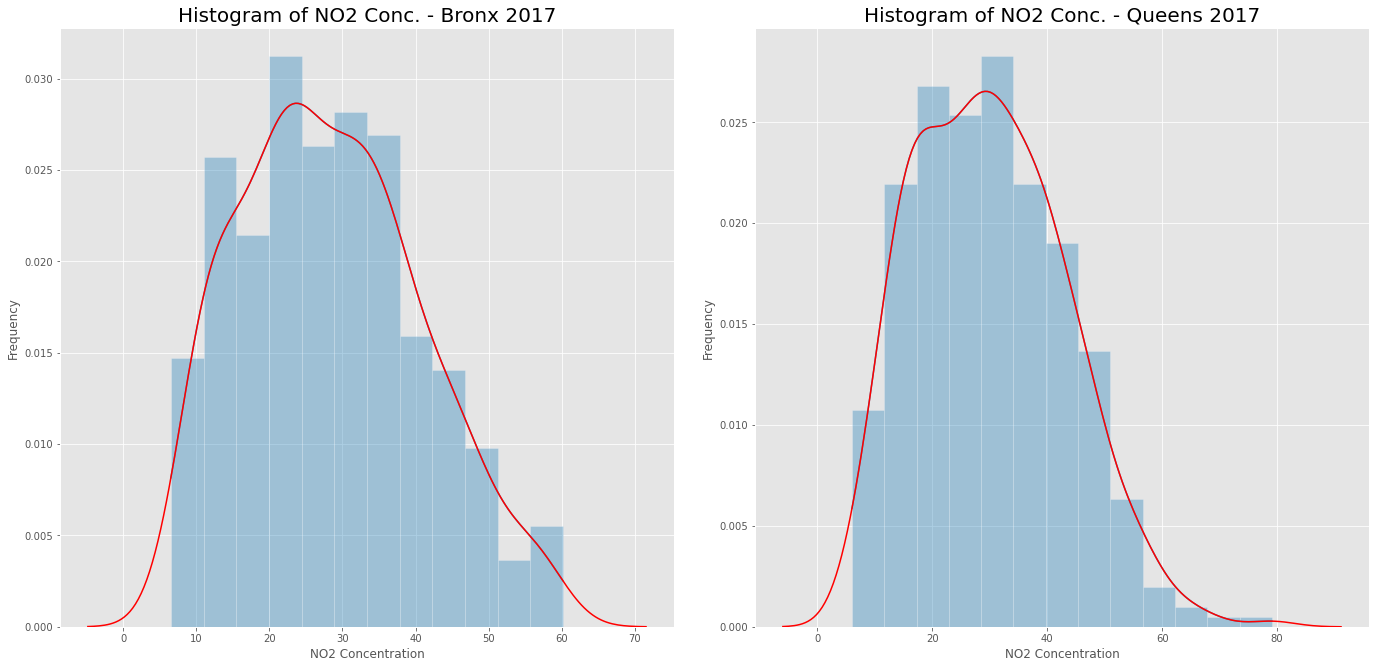

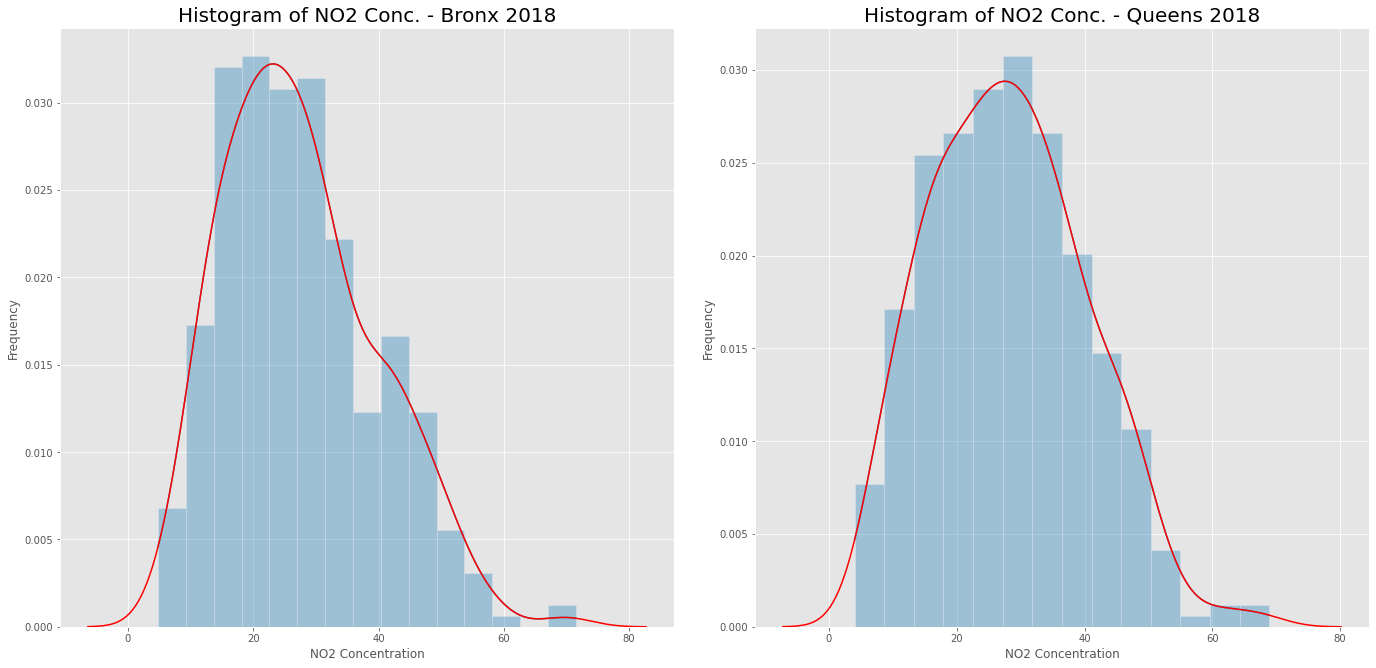



Shapiro-Wilk Test for Normality


,AQI,County,Year,Statistic,p-Value
0,NO2,Bronx,2016,0.975596,7.607009e-06
1,NO2,Queens,2016,0.984963,7.410502e-04
2,NO2,Bronx,2017,0.975494,7.485912e-06
3,NO2,Queens,2017,0.979342,4.347053e-05
4,NO2,Bronx,2018,0.970296,8.554002e-07
5,NO2,Queens,2018,0.984494,5.880154e-04


D’Agostino and Pearson Test for Normality


,AQI,County,Year,Statistic,p-Value
0,NO2,Bronx,2016,19.674155,0.000053
1,NO2,Queens,2016,9.464462,0.008807
2,NO2,Bronx,2017,16.211329,0.000302
3,NO2,Queens,2017,11.182760,0.003730
4,NO2,Bronx,2018,19.322103,0.000064
5,NO2,Queens,2018,8.486602,0.014360


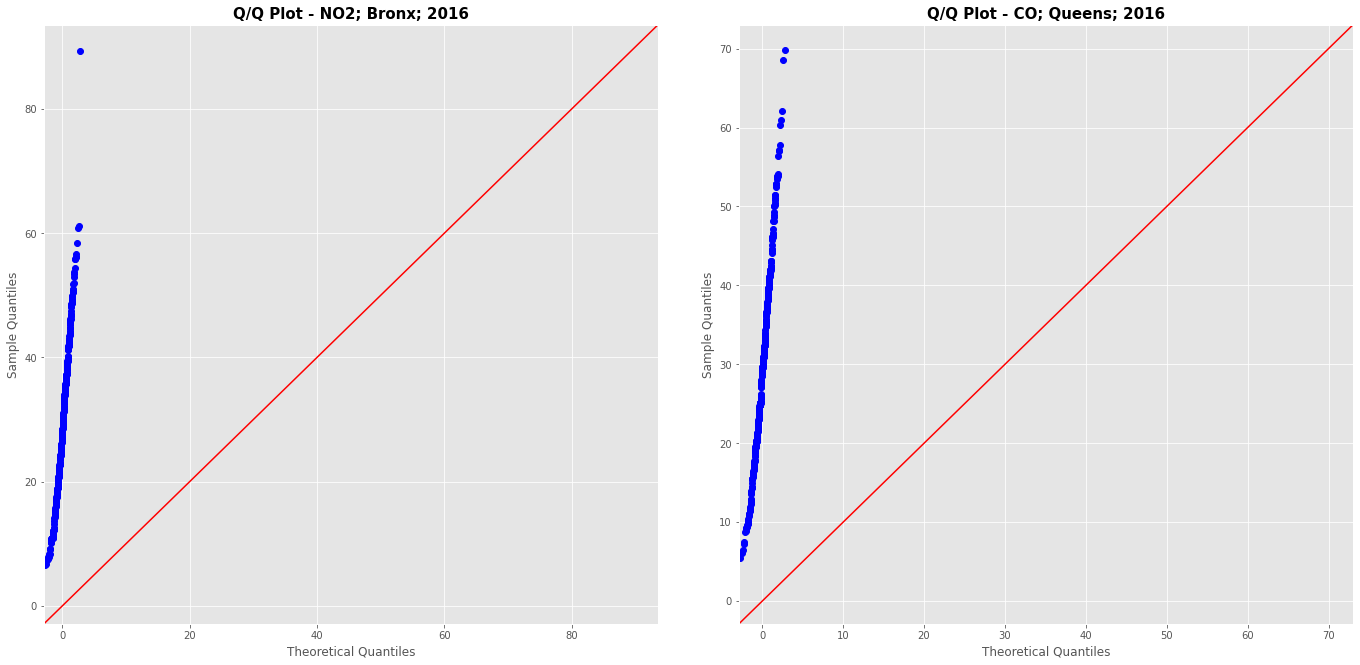

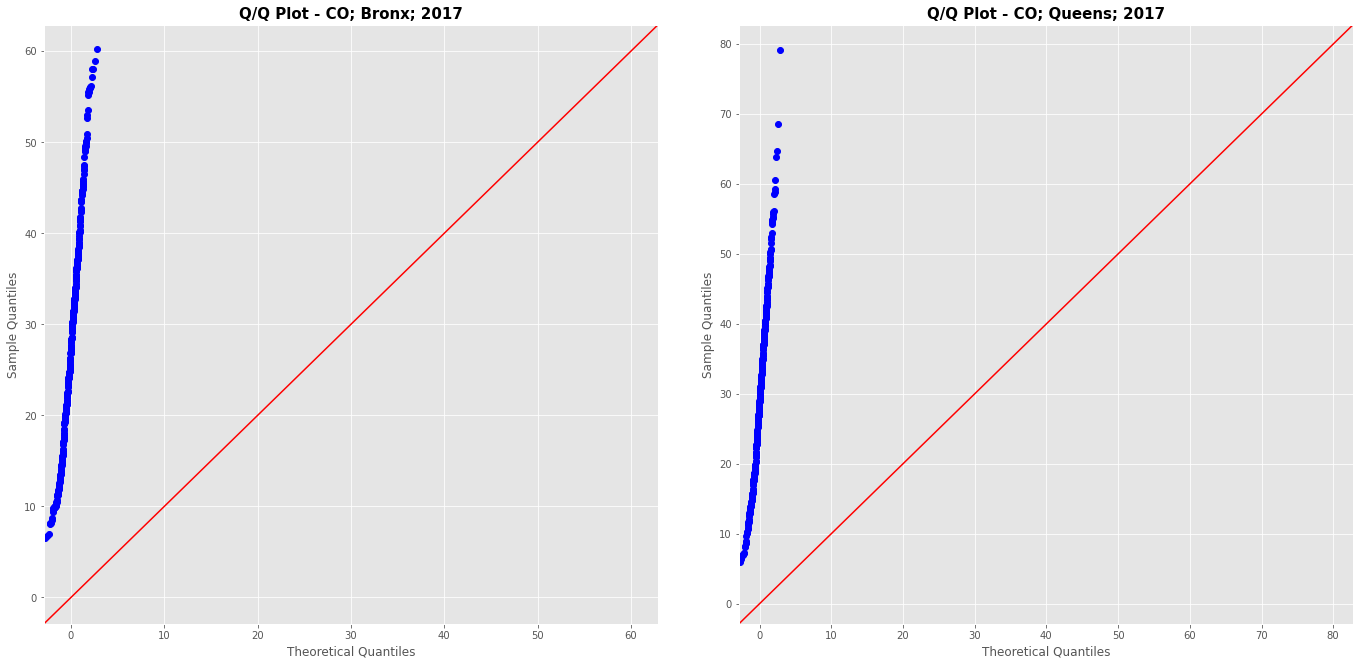

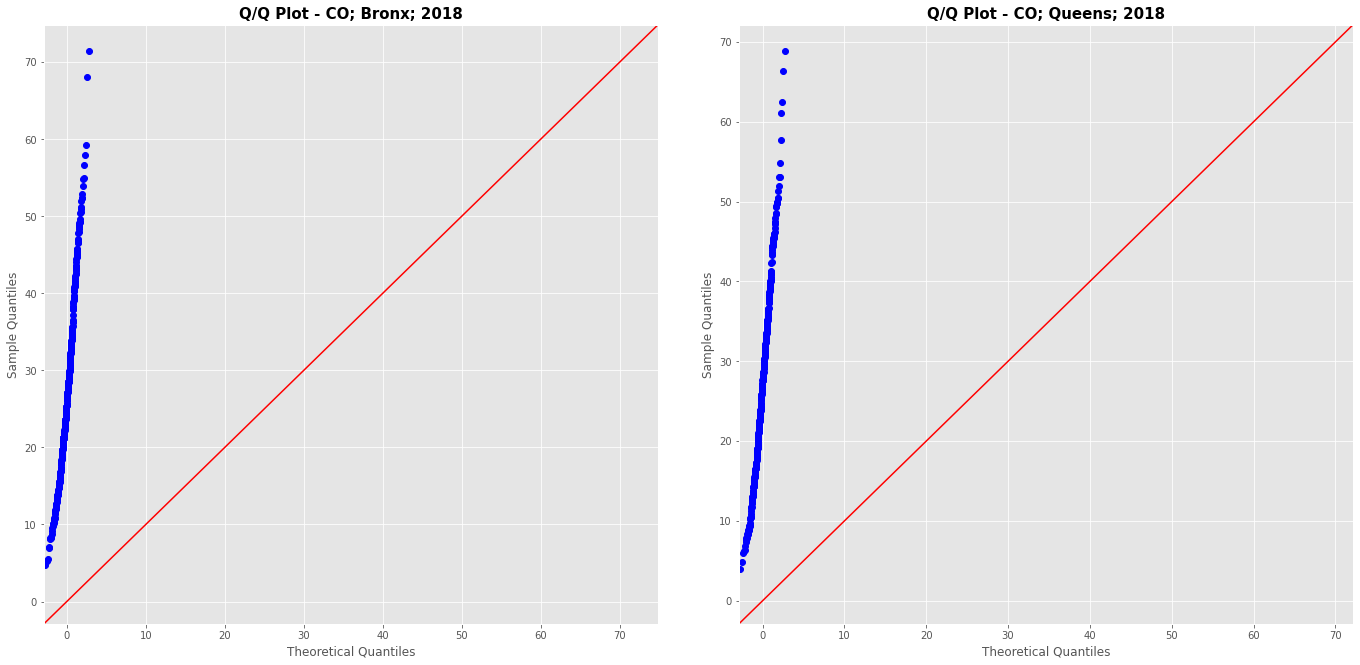

In [6]:
# 2016
plt.style.use("ggplot")
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)

# "Histogram of Nitrogen Dioxide (NO2) Concentration for Bronx County w/Curve Fit - 2016"
sns.histplot(BRONX_NO2_2016["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax1)
sns.kdeplot(data = BRONX_NO2_2016, x = "AQI_CONC", color = "red", ax = ax1)
ax1.set_xlabel("NO2 Concentration", fontsize = 12)
ax1.set_ylabel("Frequency", fontsize = 12)
ax1.set_title("Histogram of NO2 Conc. - Bronx 2016", fontsize = 20)

# "Histogram of Nitrogen Dioxide (NO2) Concentration for Queens County w/Curve Fit - 2016"
sns.histplot(QUEENS_NO2_2016["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax2)
sns.kdeplot(data = QUEENS_NO2_2016, x = "AQI_CONC", color = "red", ax = ax2)
ax2.set_xlabel("NO2 Concentration", fontsize = 12)
ax2.set_ylabel("Frequency", fontsize = 12)
ax2.set_title("Histogram of NO2 Conc. - Queens 2016", fontsize = 20)
plt.show()

print("\n")

###############################################################################################################

# 2017
plt.style.use("ggplot")
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)

# "Histogram of Nitrogen Dioxide (NO2) Concentration for Bronx County w/Curve Fit - 2017"
sns.histplot(BRONX_NO2_2017["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax1)
sns.kdeplot(data = BRONX_NO2_2017, x = "AQI_CONC", color = "red", ax = ax1)
ax1.set_xlabel("NO2 Concentration", fontsize = 12)
ax1.set_ylabel("Frequency", fontsize = 12)
ax1.set_title("Histogram of NO2 Conc. - Bronx 2017", fontsize = 20)

# "Histogram of Nitrogen Dioxide (NO2) Concentration for Queens County w/Curve Fit - 2017"
sns.histplot(QUEENS_NO2_2017["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax2)
sns.kdeplot(data = QUEENS_NO2_2017, x = "AQI_CONC", color = "red", ax = ax2)
ax2.set_xlabel("NO2 Concentration", fontsize = 12)
ax2.set_ylabel("Frequency", fontsize = 12)
ax2.set_title("Histogram of NO2 Conc. - Queens 2017", fontsize = 20)
plt.show()

print("\n")

###############################################################################################################

# 2018
plt.style.use("ggplot")
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)

# "Histogram of Nitrogen Dioxide (NO2) Concentration for Bronx County w/Curve Fit - 2018"
sns.histplot(BRONX_NO2_2018["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax1)
sns.kdeplot(data = BRONX_NO2_2018, x = "AQI_CONC", color = "red", ax = ax1)
ax1.set_xlabel("NO2 Concentration", fontsize = 12)
ax1.set_ylabel("Frequency", fontsize = 12)
ax1.set_title("Histogram of NO2 Conc. - Bronx 2018", fontsize = 20)

# "Histogram of Nitrogen Dioxide (NO2) Concentration for Queens County w/Curve Fit - 2018"
sns.histplot(QUEENS_NO2_2018["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax2)
sns.kdeplot(data = QUEENS_NO2_2018, x = "AQI_CONC", color = "red", ax = ax2)
ax2.set_xlabel("NO2 Concentration", fontsize = 12)
ax2.set_ylabel("Frequency", fontsize = 12)
ax2.set_title("Histogram of NO2 Conc. - Queens 2018", fontsize = 20)
plt.show()

print("\n")

###############################################################################################################

# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
# H0 = Data was pulled from a normal distribution
# HT = Data was NOT pulled from a normal distribution
# The Shapiro-Wilk test rejects the null hypothesis of normality when the p-value is less than or equal to 0.05

shapiro_df = pd.DataFrame({})
print(BOLD.B_start+UNDERLINE.U_start+"Shapiro-Wilk Test for Normality"+UNDERLINE.U_end+BOLD.B_end)
shapiro_df = shapiro_df.append([{"AQI":"NO2","County":"Bronx","Year":2016,"Statistic":stats.shapiro(BRONX_NO2_2016["AQI_CONC"]).statistic,"p-Value":stats.shapiro(BRONX_NO2_2016["AQI_CONC"]).pvalue},
                {"AQI":"NO2","County":"Queens","Year":2016,"Statistic":stats.shapiro(QUEENS_NO2_2016["AQI_CONC"]).statistic,"p-Value":stats.shapiro(QUEENS_NO2_2016["AQI_CONC"]).pvalue},
                {"AQI":"NO2","County":"Bronx","Year":2017,"Statistic":stats.shapiro(BRONX_NO2_2017["AQI_CONC"]).statistic,"p-Value":stats.shapiro(BRONX_NO2_2017["AQI_CONC"]).pvalue},
                {"AQI":"NO2","County":"Queens","Year":2017,"Statistic":stats.shapiro(QUEENS_NO2_2017["AQI_CONC"]).statistic,"p-Value":stats.shapiro(QUEENS_NO2_2017["AQI_CONC"]).pvalue},
                {"AQI":"NO2","County":"Bronx","Year":2018,"Statistic":stats.shapiro(BRONX_NO2_2018["AQI_CONC"]).statistic,"p-Value":stats.shapiro(BRONX_NO2_2018["AQI_CONC"]).pvalue},
                {"AQI":"NO2","County":"Queens","Year":2018,"Statistic":stats.shapiro(QUEENS_NO2_2018["AQI_CONC"]).statistic,"p-Value":stats.shapiro(QUEENS_NO2_2018["AQI_CONC"]).pvalue}], ignore_index = True)
display(shapiro_df)

###############################################################################################################

# D’Agostino and Pearson Test for Normality
# Normal Test - Tests whether a sample differs from a normal distribution.
# This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D’Agostino and Pearson’s [1], [2] test that combines skew and kurtosis to produce an omnibus test of normality.
# If the p-val is very small, it means it is unlikely that the data came from a normal distribution.

normality_df = pd.DataFrame()
print(BOLD.B_start+UNDERLINE.U_start+"D’Agostino and Pearson Test for Normality"+UNDERLINE.U_end+BOLD.B_end)
normality_df = normality_df.append([{"AQI":"NO2","County":"Bronx","Year":2016,"Statistic":stats.normaltest(BRONX_NO2_2016["AQI_CONC"]).statistic,"p-Value":stats.normaltest(BRONX_NO2_2016["AQI_CONC"]).pvalue},
                                   {"AQI":"NO2","County":"Queens","Year":2016,"Statistic":stats.normaltest(QUEENS_NO2_2016["AQI_CONC"]).statistic,"p-Value":stats.normaltest(QUEENS_NO2_2016["AQI_CONC"]).pvalue},
                                   {"AQI":"NO2","County":"Bronx","Year":2017,"Statistic":stats.normaltest(BRONX_NO2_2017["AQI_CONC"]).statistic,"p-Value":stats.normaltest(BRONX_NO2_2017["AQI_CONC"]).pvalue},
                                   {"AQI":"NO2","County":"Queens","Year":2017,"Statistic":stats.normaltest(QUEENS_NO2_2017["AQI_CONC"]).statistic,"p-Value":stats.normaltest(QUEENS_NO2_2017["AQI_CONC"]).pvalue},
                                   {"AQI":"NO2","County":"Bronx","Year":2018,"Statistic":stats.normaltest(BRONX_NO2_2018["AQI_CONC"]).statistic,"p-Value":stats.normaltest(BRONX_NO2_2018["AQI_CONC"]).pvalue},
                                   {"AQI":"NO2","County":"Queens","Year":2018,"Statistic":stats.normaltest(QUEENS_NO2_2018["AQI_CONC"]).statistic,"p-Value":stats.normaltest(QUEENS_NO2_2018["AQI_CONC"]).pvalue}])
display(normality_df)
print("\n")
###############################################################################################################

# Q/Q Plot
# Normal Test - Tests whether a sample differs from a normal distribution.
# This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D’Agostino and Pearson’s [1], [2] test that combines skew and kurtosis to produce an omnibus test of normality.
# If the p-val is very small, it means it is unlikely that the data came from a normal distribution.

#2016
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sm.qqplot(BRONX_NO2_2016["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax1)
ax1.set_title("Q/Q Plot - NO2; Bronx; 2016", fontweight = "bold", size = 15)
sm.qqplot(QUEENS_NO2_2016["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax2)
ax2.set_title("Q/Q Plot - CO; Queens; 2016", fontweight = "bold", size = 15)

#2017
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sm.qqplot(BRONX_NO2_2017["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax1)
ax1.set_title("Q/Q Plot - CO; Bronx; 2017", fontweight = "bold", size = 15)
sm.qqplot(QUEENS_NO2_2017["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax2)
ax2.set_title("Q/Q Plot - CO; Queens; 2017", fontweight = "bold", size = 15)

#2018
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sm.qqplot(BRONX_NO2_2018["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax1)
ax1.set_title("Q/Q Plot - CO; Bronx; 2018", fontweight = "bold", size = 15)
sm.qqplot(QUEENS_NO2_2018["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax2)
ax2.set_title("Q/Q Plot - CO; Queens; 2018", fontweight = "bold", size = 15)
plt.show()

### Min & Max Values & Dates 

In [7]:
# 2016 Min
print(BOLD.B_start+UNDERLINE.U_start+"Minimum AQI Conc. & Date - 2016"+UNDERLINE.U_end+BOLD.B_end)
BRONX_NO2_2016_MIN = BRONX_NO2_2016[BRONX_NO2_2016["AQI_CONC"] == BRONX_NO2_2016["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_NO2_2016_MIN = BRONX_NO2_2016_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_NO2_2016_MIN)
QUEENS_NO2_2016_MIN = QUEENS_NO2_2016[QUEENS_NO2_2016["AQI_CONC"] == QUEENS_NO2_2016["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_NO2_2016_MIN = QUEENS_NO2_2016_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_NO2_2016_MIN)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)

# 2016 Max
print(BOLD.B_start+UNDERLINE.U_start+"Maximum AQI Conc. & Date - 2016"+UNDERLINE.U_end+BOLD.B_end)
BRONX_NO2_2016_MAX = BRONX_NO2_2016[BRONX_NO2_2016["AQI_CONC"] == BRONX_NO2_2016["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_NO2_2016_MAX = BRONX_NO2_2016_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_NO2_2016_MAX)
QUEENS_NO2_2016_MAX = QUEENS_NO2_2016[QUEENS_NO2_2016["AQI_CONC"] == QUEENS_NO2_2016["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_NO2_2016_MAX = QUEENS_NO2_2016_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_NO2_2016_MAX)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)

# 2017 Min
print(BOLD.B_start+UNDERLINE.U_start+"Minimum AQI Conc. & Date - 2017"+UNDERLINE.U_end+BOLD.B_end)
BRONX_NO2_2017_MIN = BRONX_NO2_2017[BRONX_NO2_2017["AQI_CONC"] == BRONX_NO2_2017["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_NO2_2017_MIN = BRONX_NO2_2017_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_NO2_2017_MIN)
QUEENS_NO2_2017_MIN = QUEENS_NO2_2017[QUEENS_NO2_2017["AQI_CONC"] == QUEENS_NO2_2017["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_NO2_2017_MIN = QUEENS_NO2_2017_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_NO2_2017_MIN)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)

# 2017 Max
print(BOLD.B_start+UNDERLINE.U_start+"Maximum AQI Conc. & Date - 2017"+UNDERLINE.U_end+BOLD.B_end)
BRONX_NO2_2017_MAX = BRONX_NO2_2017[BRONX_NO2_2017["AQI_CONC"] == BRONX_NO2_2017["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_NO2_2017_MAX = BRONX_NO2_2017_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_NO2_2017_MAX)
QUEENS_NO2_2017_MAX = QUEENS_NO2_2017[QUEENS_NO2_2017["AQI_CONC"] == QUEENS_NO2_2017["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_NO2_2017_MAX = QUEENS_NO2_2017_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_NO2_2017_MAX)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)

# 2018 Min
print(BOLD.B_start+UNDERLINE.U_start+"Minimum AQI Conc. & Date - 2018"+UNDERLINE.U_end+BOLD.B_end)
BRONX_NO2_2018_MIN = BRONX_NO2_2018[BRONX_NO2_2018["AQI_CONC"] == BRONX_NO2_2018["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_NO2_2018_MIN = BRONX_NO2_2018_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_NO2_2018_MIN)
QUEENS_NO2_2018_MIN = QUEENS_NO2_2018[QUEENS_NO2_2018["AQI_CONC"] == QUEENS_NO2_2018["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_NO2_2018_MIN = QUEENS_NO2_2018_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_NO2_2018_MIN)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)

# 2018 Max
print(BOLD.B_start+UNDERLINE.U_start+"Maximum AQI Conc. & Date - 2018"+UNDERLINE.U_end+BOLD.B_end)
BRONX_NO2_2018_MAX = BRONX_NO2_2018[BRONX_NO2_2018["AQI_CONC"] == BRONX_NO2_2018["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_NO2_2018_MAX = BRONX_NO2_2018_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_NO2_2018_MAX)
QUEENS_NO2_2018_MAX = QUEENS_NO2_2018[QUEENS_NO2_2018["AQI_CONC"] == QUEENS_NO2_2018["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_NO2_2018_MAX = QUEENS_NO2_2018_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_NO2_2018_MAX)

Minimum AQI Conc. & Date - 2016


,DATE,AQI_CONC,AQI_UNITS,COUNTY
274,2016-10-01,6.6,ppb,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
640,2016-10-01,5.4,ppb,Queens


_________________________________________________________________________________
Maximum AQI Conc. & Date - 2016


,DATE,AQI_CONC,AQI_UNITS,COUNTY
68,2016-03-09,89.4,ppb,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
435,2016-03-10,69.8,ppb,Queens


_________________________________________________________________________________
Minimum AQI Conc. & Date - 2017


,DATE,AQI_CONC,AQI_UNITS,COUNTY
144,2017-05-25,6.5,ppb,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
626,2017-09-19,6.0,ppb,Queens


_________________________________________________________________________________
Maximum AQI Conc. & Date - 2017


,DATE,AQI_CONC,AQI_UNITS,COUNTY
99,2017-04-10,60.2,ppb,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
441,2017-03-18,79.1,ppb,Queens


_________________________________________________________________________________
Minimum AQI Conc. & Date - 2018


,DATE,AQI_CONC,AQI_UNITS,COUNTY
104,2018-04-15,4.8,ppb,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
569,2018-07-24,4.0,ppb,Queens


_________________________________________________________________________________
Maximum AQI Conc. & Date - 2018


,DATE,AQI_CONC,AQI_UNITS,COUNTY
120,2018-05-01,71.5,ppb,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
485,2018-05-01,68.9,ppb,Queens


### Geospatial Plot

In [ ]:
#display(BRONX_CO_2016.head())
ny_map = gpd.read_file('/Users/wwaynerichards/Desktop/Borough Boundaries/geo_export_4bf61b73-3f85-41ef-9ccc-c01719c9f685.shp')
ny_map = ny_map.astype({'boro_code':'int64'}).rename(columns = {"boro_code":"COUNTY"})
display(ny_map)

#fig, ax = plt.subplots(figsize = (15,15))
#ny_map.plot(ax = ax)
#plt.show()

NO2_2016

geo_df = ny_map.merge(NO2_2016, left_on = "COUNTY", how = "left")           
geo_df.head(3)



#crs = {'init':'epsg:4326'}

#geometry = [Polygon(xy) for xy in zip(BRONX_CO_2016["SITE_LONGITUDE"], BRONX_CO_2016["SITE_LATITUDE"])]
#display()

#geo_df = gpd.GeoDataFrame(BRONX_CO_2016, crs = crs, geometry = geometry)
#geo_df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
geoplot.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.plot(ax=ax, markersize=20, color='blue', marker='o', label = 'Neg')
plt.legend(prop = {'size':15})
plt.show()